In [17]:
#https://wtrust.com.br/
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import cointegration_mult as mult
import Cointegration as coint

importlib.reload(coint)
importlib.reload(mult)

<module 'cointegration_mult' from 'D:\\trades\\pairs_trading_b3\\cointegration_mult.py'>

[Baixar base do yahoo](http://127.0.0.1:8888/notebooks/trades/pairs_trading_b3/utils/Historic-Yahoo.ipynb)

In [115]:
def plot_pairs(pairs, data, period_ext=None):
    counter=-1
    for i, row in pairs.iterrows():
        counter+=1
        print(counter)
        y_symbol = row['Dependent']
        x_symbol = row['Independent']
        if (period_ext == None):
            period = row['Period']
        else:
            period=period_ext
        mult.plot_residue3(data, y_symbol, x_symbol, period)

def lot_short_cash_neutral(price_long, price_short, lot_long):
    return roundup((price_long*lot_long)/price_short)

def roundup(value):
    #return int(math.ceil(value / 100.0)) * 100
    ret = int(round(value, -2))
    if (ret <= 0):
        return 100
    return ret

def parameters_input_cash_neutral(pairs, data, lot=100):
    for i, row in oper.iterrows():
        y_symbol = row['Dependent']
        x_symbol = row['Independent']
        signalStr = row['SignalStr'].split('/')

        y_price = data[y_symbol][0]
        x_price = data[x_symbol][0]

        y_lot = 0
        x_lot = 0
        if (signalStr[0]=='Long'):
            x_lot = lot_short_cash_neutral(y_price, x_price, lot)
            y_lot = lot
        else:
            y_lot = lot_short_cash_neutral(x_price, y_price, lot)
            x_lot = lot

        print('{}: {} ({}) {} <-> {}: {} ({}) {}'.format(\
            signalStr[0], y_symbol, round(y_price, 2), y_lot, signalStr[1], x_symbol, round(x_price, 2), x_lot))
        
def check_coint(pairs, data):
    for i, row in oper.iterrows():
        y_symbol = row['Dependent']
        x_symbol = row['Independent']
        period = row['Period']
        check = mult.check_cointegration(data[y_symbol], data[x_symbol], period)
        print('{}/{}, {}, {}, {}'.format(y_symbol, x_symbol, period, check['is_stationary'], check['adf']))

In [19]:
path_data_cart = 'datasets/data_cart.csv'
path_data_yahoo = 'datasets/data_yahoo.csv'
path_data = 'datasets/data.csv'

In [20]:
data = pd.read_csv(path_data_yahoo, index_col=0)
data = data[::-1]
pairs = pd.read_csv('datasets/cointegrated_pairs_mult.csv')

print('{} to {}'.format(data.index[-1], data.index[0]))
print('data: {}'.format(data.shape))
print('pairs: {}'.format(pairs.shape))

2019-05-02 to 2020-08-13
data: (321, 72)
pairs: (2205, 12)


In [21]:
#data.to_excel('datasets/data_cart.xlsx')

In [56]:
#pairs

In [28]:
pairs_signal = pairs.loc[
    (pairs['Std'] > 2) \
    & (pairs['Std'] <= 2.5) \
    & (pairs['PeriodQt'] >= 9) \
    & (pairs['ADF'] >= 99) \
    & (pairs['HalfLife'] <= 6) \
].sort_values(by=['HalfLife'], ascending=True).copy()
pairs_signal.reset_index(drop=True, inplace=True)
pairs_signal

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,Std,HalfLife,SignalStr,Corr,PeriodQt,PeriodStr
0,100,EGIE3,EMBR3,-5.253019,99,0.673937,2.117169,2,Long/Short,0.324547,9,"100,120,140,160,180,200,220,240,250"
1,100,ENGI11,GNDI3,-4.829187,99,0.557605,2.022712,2,Long/Short,0.500966,9,"100,120,140,160,180,200,220,240,250"
2,100,RADL3,TAEE11,-3.807030,99,-0.658756,2.061516,2,Long/Short,0.204591,9,"100,120,140,160,180,200,220,240,250"
3,100,BBAS3,EMBR3,-3.567581,99,1.635818,2.011353,3,Long/Short,0.685225,9,"100,120,140,160,180,200,220,240,250"
4,100,ENGI11,FLRY3,-4.035741,99,1.275151,2.412684,3,Long/Short,0.472271,9,"100,120,140,160,180,200,220,240,250"
5,100,ENGI11,LREN3,-3.975987,99,0.644408,2.396194,3,Long/Short,0.569988,9,"100,120,140,160,180,200,220,240,250"
6,100,MGLU3,VALE3,-3.819546,99,0.387285,2.262396,3,Long/Short,0.248647,9,"100,120,140,160,180,200,220,240,250"
7,100,MRVE3,VALE3,-3.730405,99,0.206130,2.009040,4,Long/Short,0.305024,9,"100,120,140,160,180,200,220,240,250"


In [31]:
mult.halflife_ser(data['MRVE3'], data['VALE3'], 100)

14.21439472642591

Plot o gráficos dos resíduos de 'pairs_signal'

In [114]:
#plot_pairs(pairs_signal, data)
#mult.plot_residue(mult.residue(data['HAPV3'], data['IRBR3'], 100))

In [10]:
#pairs_signal.to_csv('datasets/sinais/sinais_06072020.csv', index=False)
data['HAPV3'][0], data['IRBR3'][0]

(62.61000061035156, 7.679999828338622)

In [11]:
#pairs_signal.iloc[[0,1,3]].to_csv('datasets/oper/13072020.csv', index=False)

# Análise das operações abertas

In [104]:
oper = pd.read_csv('datasets/operations.csv')
oper

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,Std,HalfLife,SignalStr,Corr,PeriodQt,PeriodStr
0,100,EGIE3,EMBR3,-5.253019,99,0.673937,2.117169,2,Long/Short,0.324547,9,"100,120,140,160,180,200,220,240,250"
1,100,ENGI11,GNDI3,-4.829187,99,0.557605,2.022712,2,Long/Short,0.500966,9,"100,120,140,160,180,200,220,240,250"
2,100,RADL3,TAEE11,-3.807030,99,-0.658756,2.061516,2,Long/Short,0.204591,9,"100,120,140,160,180,200,220,240,250"
3,100,ENGI11,LREN3,-3.975987,99,0.644408,2.396194,3,Long/Short,0.569988,9,"100,120,140,160,180,200,220,240,250"
4,100,MGLU3,VALE3,-3.819546,99,0.387285,2.262396,3,Long/Short,0.248647,9,"100,120,140,160,180,200,220,240,250"
5,100,ABEV3,BPAC11,-4.891320,99,0.070160,2.305211,2,Long/Short,0.641191,9,"100,120,140,160,180,200,220,240,250"
6,100,CIEL3,ITUB4,-4.441627,99,0.313495,2.119107,2,Short/Long,0.631480,9,"100,120,140,160,180,200,220,240,250"


In [105]:
"""new = pairs_signal.iloc[[0,1,2,5,6]].copy()

oper = pd.concat([new, oper])
oper.reset_index(drop=True, inplace=True)
oper.to_csv('datasets/operations.csv', index=False)
oper"""

"new = pairs_signal.iloc[[0,1,2,5,6]].copy()\n\noper = pd.concat([new, oper])\noper.reset_index(drop=True, inplace=True)\noper.to_csv('datasets/operations.csv', index=False)\noper"

In [14]:
#oper.to_csv('datasets/operations.csv', index=False)

In [109]:
check_coint(oper, data)

EGIE3/EMBR3, 100, True, 99
ENGI11/GNDI3, 100, True, 99
RADL3/TAEE11, 100, True, 99
ENGI11/LREN3, 100, True, 99
MGLU3/VALE3, 100, True, 99
ABEV3/BPAC11, 100, True, 99
CIEL3/ITUB4, 100, True, 95


0


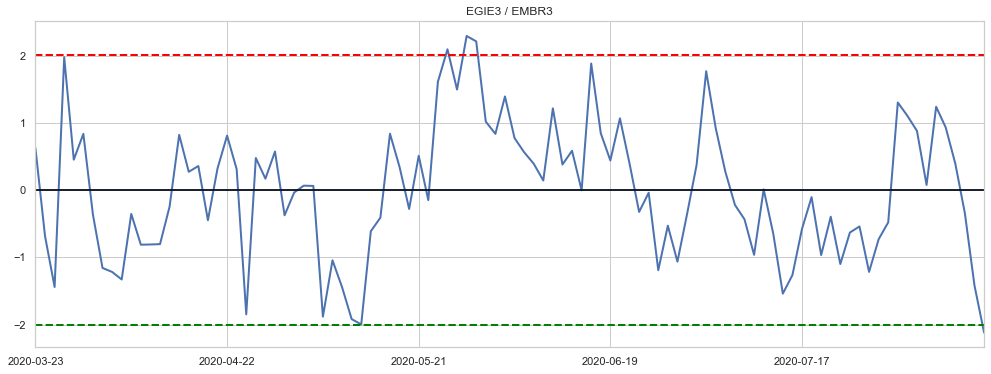

1


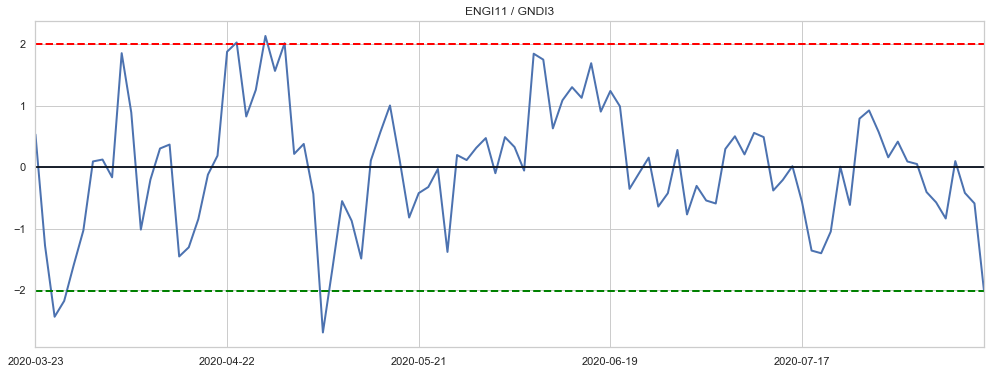

2


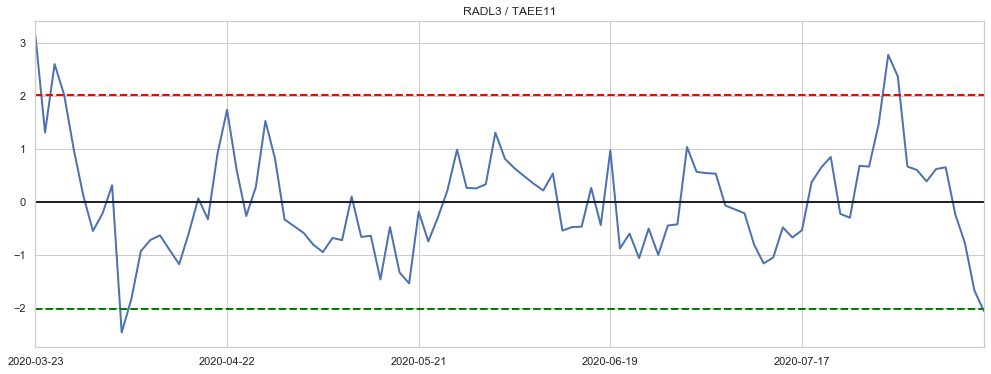

3


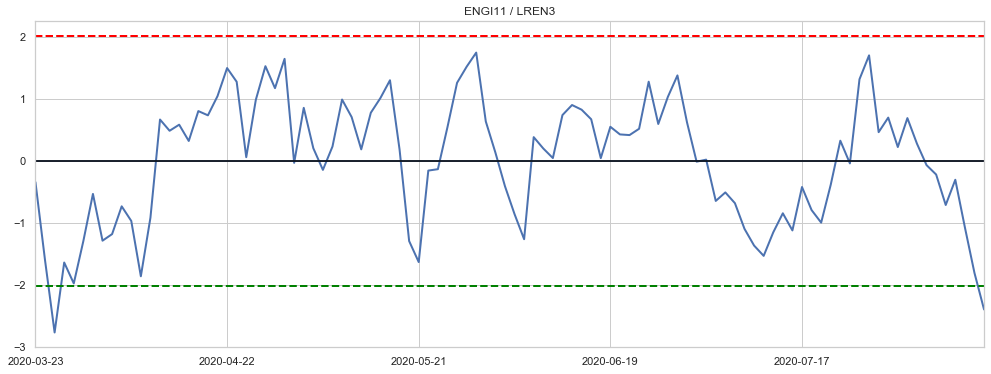

4


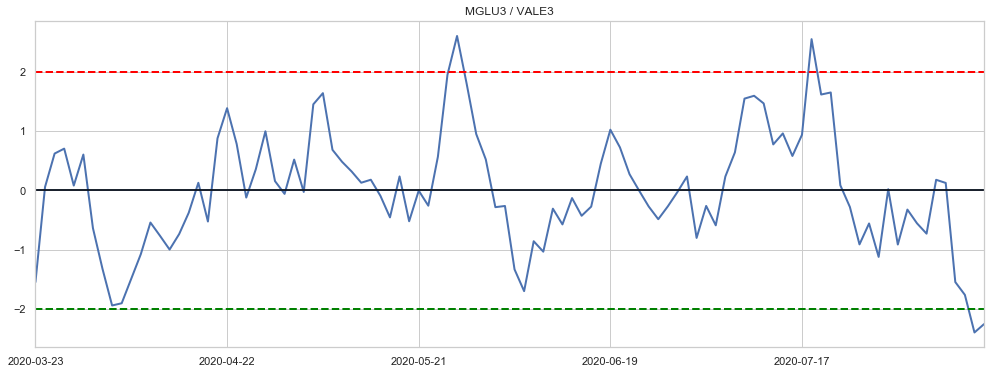

5


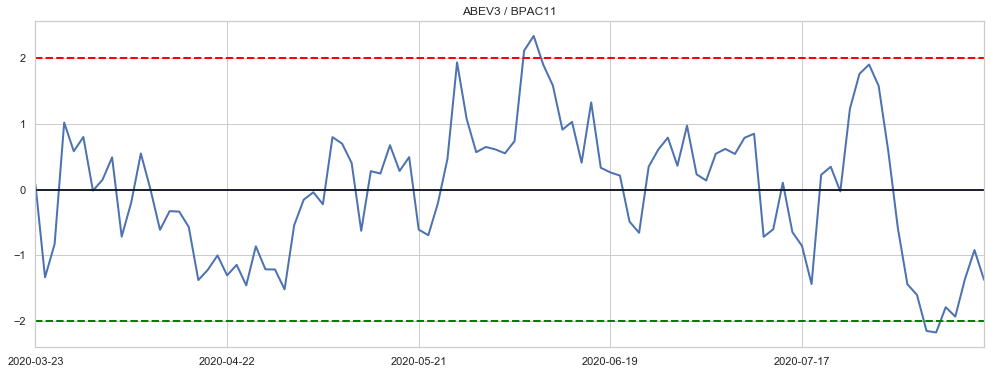

6


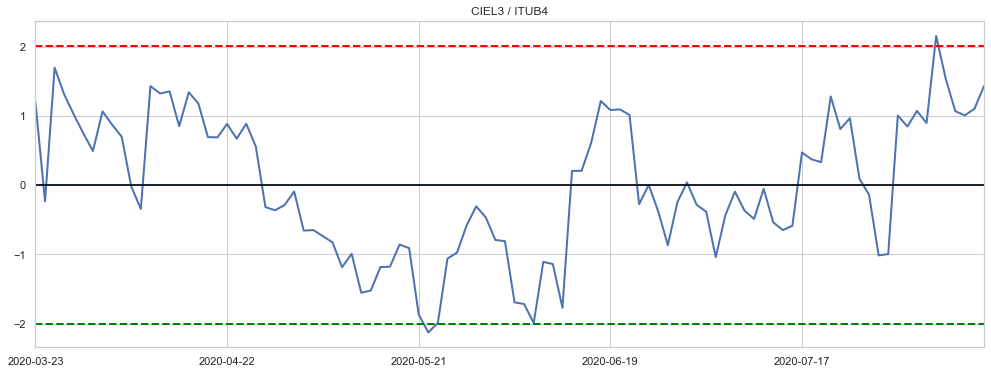

In [113]:
plot_pairs(oper, data)

In [110]:
#df.to_excel('datasets/data_cart.xlsx')

In [116]:
parameters_input_cash_neutral(oper, data)

Long: EGIE3 (43.11) 100 <-> Short: EMBR3 (7.6) 600
Long: ENGI11 (44.86) 100 <-> Short: GNDI3 (66.31) 100
Long: RADL3 (110.09) 100 <-> Short: TAEE11 (28.62) 400
Long: ENGI11 (44.86) 100 <-> Short: LREN3 (40.64) 100
Long: MGLU3 (80.45) 100 <-> Short: VALE3 (60.35) 100
Long: ABEV3 (13.21) 100 <-> Short: BPAC11 (85.46) 100
Short: CIEL3 (4.99) 500 <-> Long: ITUB4 (24.5) 100


In [71]:
"""for i, row in oper.iterrows():
    y_symbol = row['Dependent']
    x_symbol = row['Independent']
    period = row['Period']
    mult.summary(data, y_symbol, x_symbol, period)"""

"for i, row in oper.iterrows():\n    y_symbol = row['Dependent']\n    x_symbol = row['Independent']\n    period = row['Period']\n    mult.summary(data, y_symbol, x_symbol, period)"